## House prediction competition notebook

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
sns.set()

In [2]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [3]:
df_train

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
0            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
2            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
3            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
4            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
...          ...       ...  ...      ...    ...    ...         ...     ...   
1455         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1456         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
1457         Lvl    AllPub  ...        0    NaN  GdPrv        Shed    2500   
1458         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1459         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   

     MoSold YrSold  SaleType  SaleCondition  SalePrice  
0         2   2008        WD         Normal     208500  
1         5   2007        WD         Normal     181500  
2         9   2008        WD         Normal     223500  
3         2   2006        WD        Abnorml     140000  
4        12   2008        WD         Normal     250000  
...     ...    ...       ...            ...        ...  
1455      8   2007        WD         Normal     175000  
1456      2   2010        WD         Normal     210000  
1457      5   2010        WD         Normal     266500  
1458      4   2010        WD         Normal     142125  
1459      6   2008        WD         Normal     147500  

[1460 rows x 81 columns]

In [4]:
df_test

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0     1461          20       RH         80.0    11622   Pave   NaN      Reg   
1     1462          20       RL         81.0    14267   Pave   NaN      IR1   
2     1463          60       RL         74.0    13830   Pave   NaN      IR1   
3     1464          60       RL         78.0     9978   Pave   NaN      IR1   
4     1465         120       RL         43.0     5005   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1454  2915         160       RM         21.0     1936   Pave   NaN      Reg   
1455  2916         160       RM         21.0     1894   Pave   NaN      Reg   
1456  2917          20       RL        160.0    20000   Pave   NaN      Reg   
1457  2918          85       RL         62.0    10441   Pave   NaN      Reg   
1458  2919          60       RL         74.0     9627   Pave   NaN      Reg   

     LandContour Utilities  ... ScreenPorch PoolArea PoolQC  Fence  \
0            Lvl    AllPub  ...         120        0    NaN  MnPrv   
1            Lvl    AllPub  ...           0        0    NaN    NaN   
2            Lvl    AllPub  ...           0        0    NaN  MnPrv   
3            Lvl    AllPub  ...           0        0    NaN    NaN   
4            HLS    AllPub  ...         144        0    NaN    NaN   
...          ...       ...  ...         ...      ...    ...    ...   
1454         Lvl    AllPub  ...           0        0    NaN    NaN   
1455         Lvl    AllPub  ...           0        0    NaN    NaN   
1456         Lvl    AllPub  ...           0        0    NaN    NaN   
1457         Lvl    AllPub  ...           0        0    NaN  MnPrv   
1458         Lvl    AllPub  ...           0        0    NaN    NaN   

     MiscFeature MiscVal MoSold  YrSold  SaleType  SaleCondition  
0            NaN       0      6    2010        WD         Normal  
1           Gar2   12500      6    2010        WD         Normal  
2            NaN       0      3    2010        WD         Normal  
3            NaN       0      6    2010        WD         Normal  
4            NaN       0      1    2010        WD         Normal  
...          ...     ...    ...     ...       ...            ...  
1454         NaN       0      6    2006        WD         Normal  
1455         NaN       0      4    2006        WD        Abnorml  
1456         NaN       0      9    2006        WD        Abnorml  
1457        Shed     700      7    2006        WD         Normal  
1458         NaN       0     11    2006        WD         Normal  

[1459 rows x 80 columns]

#### the test data seems to be missing one column

In [5]:
# check which column is missing
[i for i in df_train.columns if i not in df_test.columns]

['SalePrice']

### it turns out that i have to predict the prices without actually seeing their actual values

#### alright let's jump into the training data

In [6]:
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [7]:
df_train.SalePrice.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

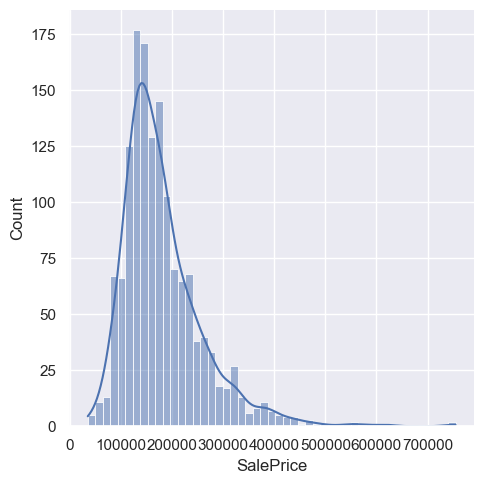

In [8]:
sns.displot(df_train.SalePrice, kde=True)

### too many features, let's use a heatmap to get the significant values

<AxesSubplot:>

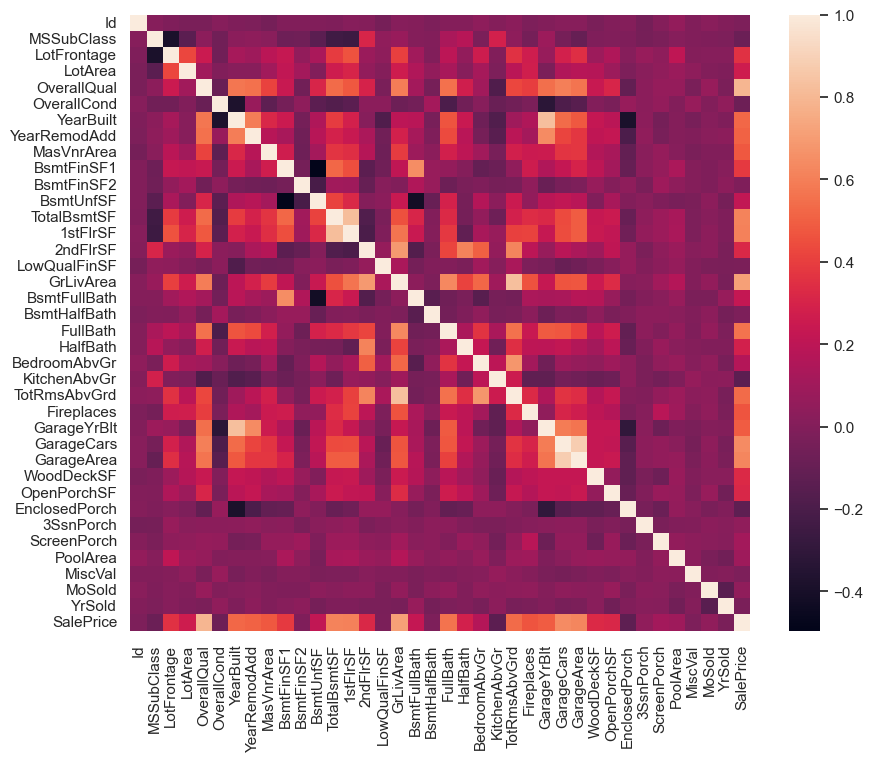

In [9]:
plt.figure(figsize=(10,8))
sns.heatmap(df_train.corr())

the heatmap is missing certain categorical variables that we might need. let's make a list of them

In [10]:
cat = ['KitchenQual','SaleCondition','Neighborhood','Utilities','OverallCond','CentralAir', 'Electrical','Heating','Foundation', 'SaleType', 
       'PavedDrive', 'BedroomAbvGr','ExterQual', 'ExterCond', 'HouseStyle','MSZoning','Condition1', 'Condition2', 'BldgType',
      'Exterior1st', 'Exterior2nd']

#### let's select the 18 best features from the heatmap

<AxesSubplot:>

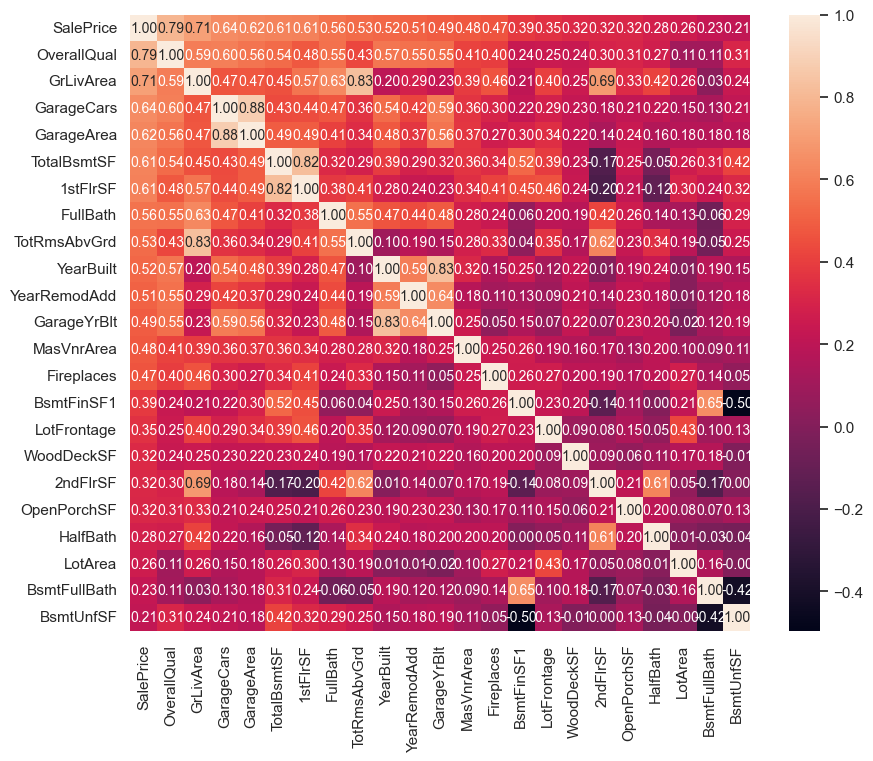

In [11]:
n = 23
plt.figure(figsize=(10,8))
cols = df_train.corr().nlargest(n, 'SalePrice')['SalePrice'].index
sns.heatmap(df_train[cols].corr(), annot=True, fmt='.2f', annot_kws={'size':10})

#### remove one of the independent variables that are highly correlated with each other. i.e twin variables

In [12]:
df = df_train[cols].drop(['GarageYrBlt', '1stFlrSF', '2ndFlrSF', 'TotRmsAbvGrd', 'GarageCars',
                          'BsmtUnfSF'], axis=1)

In [13]:
df.shape

(1460, 17)

In [14]:
df.columns

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageArea', 'TotalBsmtSF',
       'FullBath', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'Fireplaces',
       'BsmtFinSF1', 'LotFrontage', 'WoodDeckSF', 'OpenPorchSF', 'HalfBath',
       'LotArea', 'BsmtFullBath'],
      dtype='object')

In [15]:
df_ = df_test[['OverallQual', 'GrLivArea', 'GarageArea', 'TotalBsmtSF',
       'FullBath', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'Fireplaces',
       'BsmtFinSF1', 'LotFrontage', 'WoodDeckSF', 'OpenPorchSF', 'HalfBath',
       'LotArea', 'BsmtFullBath']]

### let's plot their scatterplots

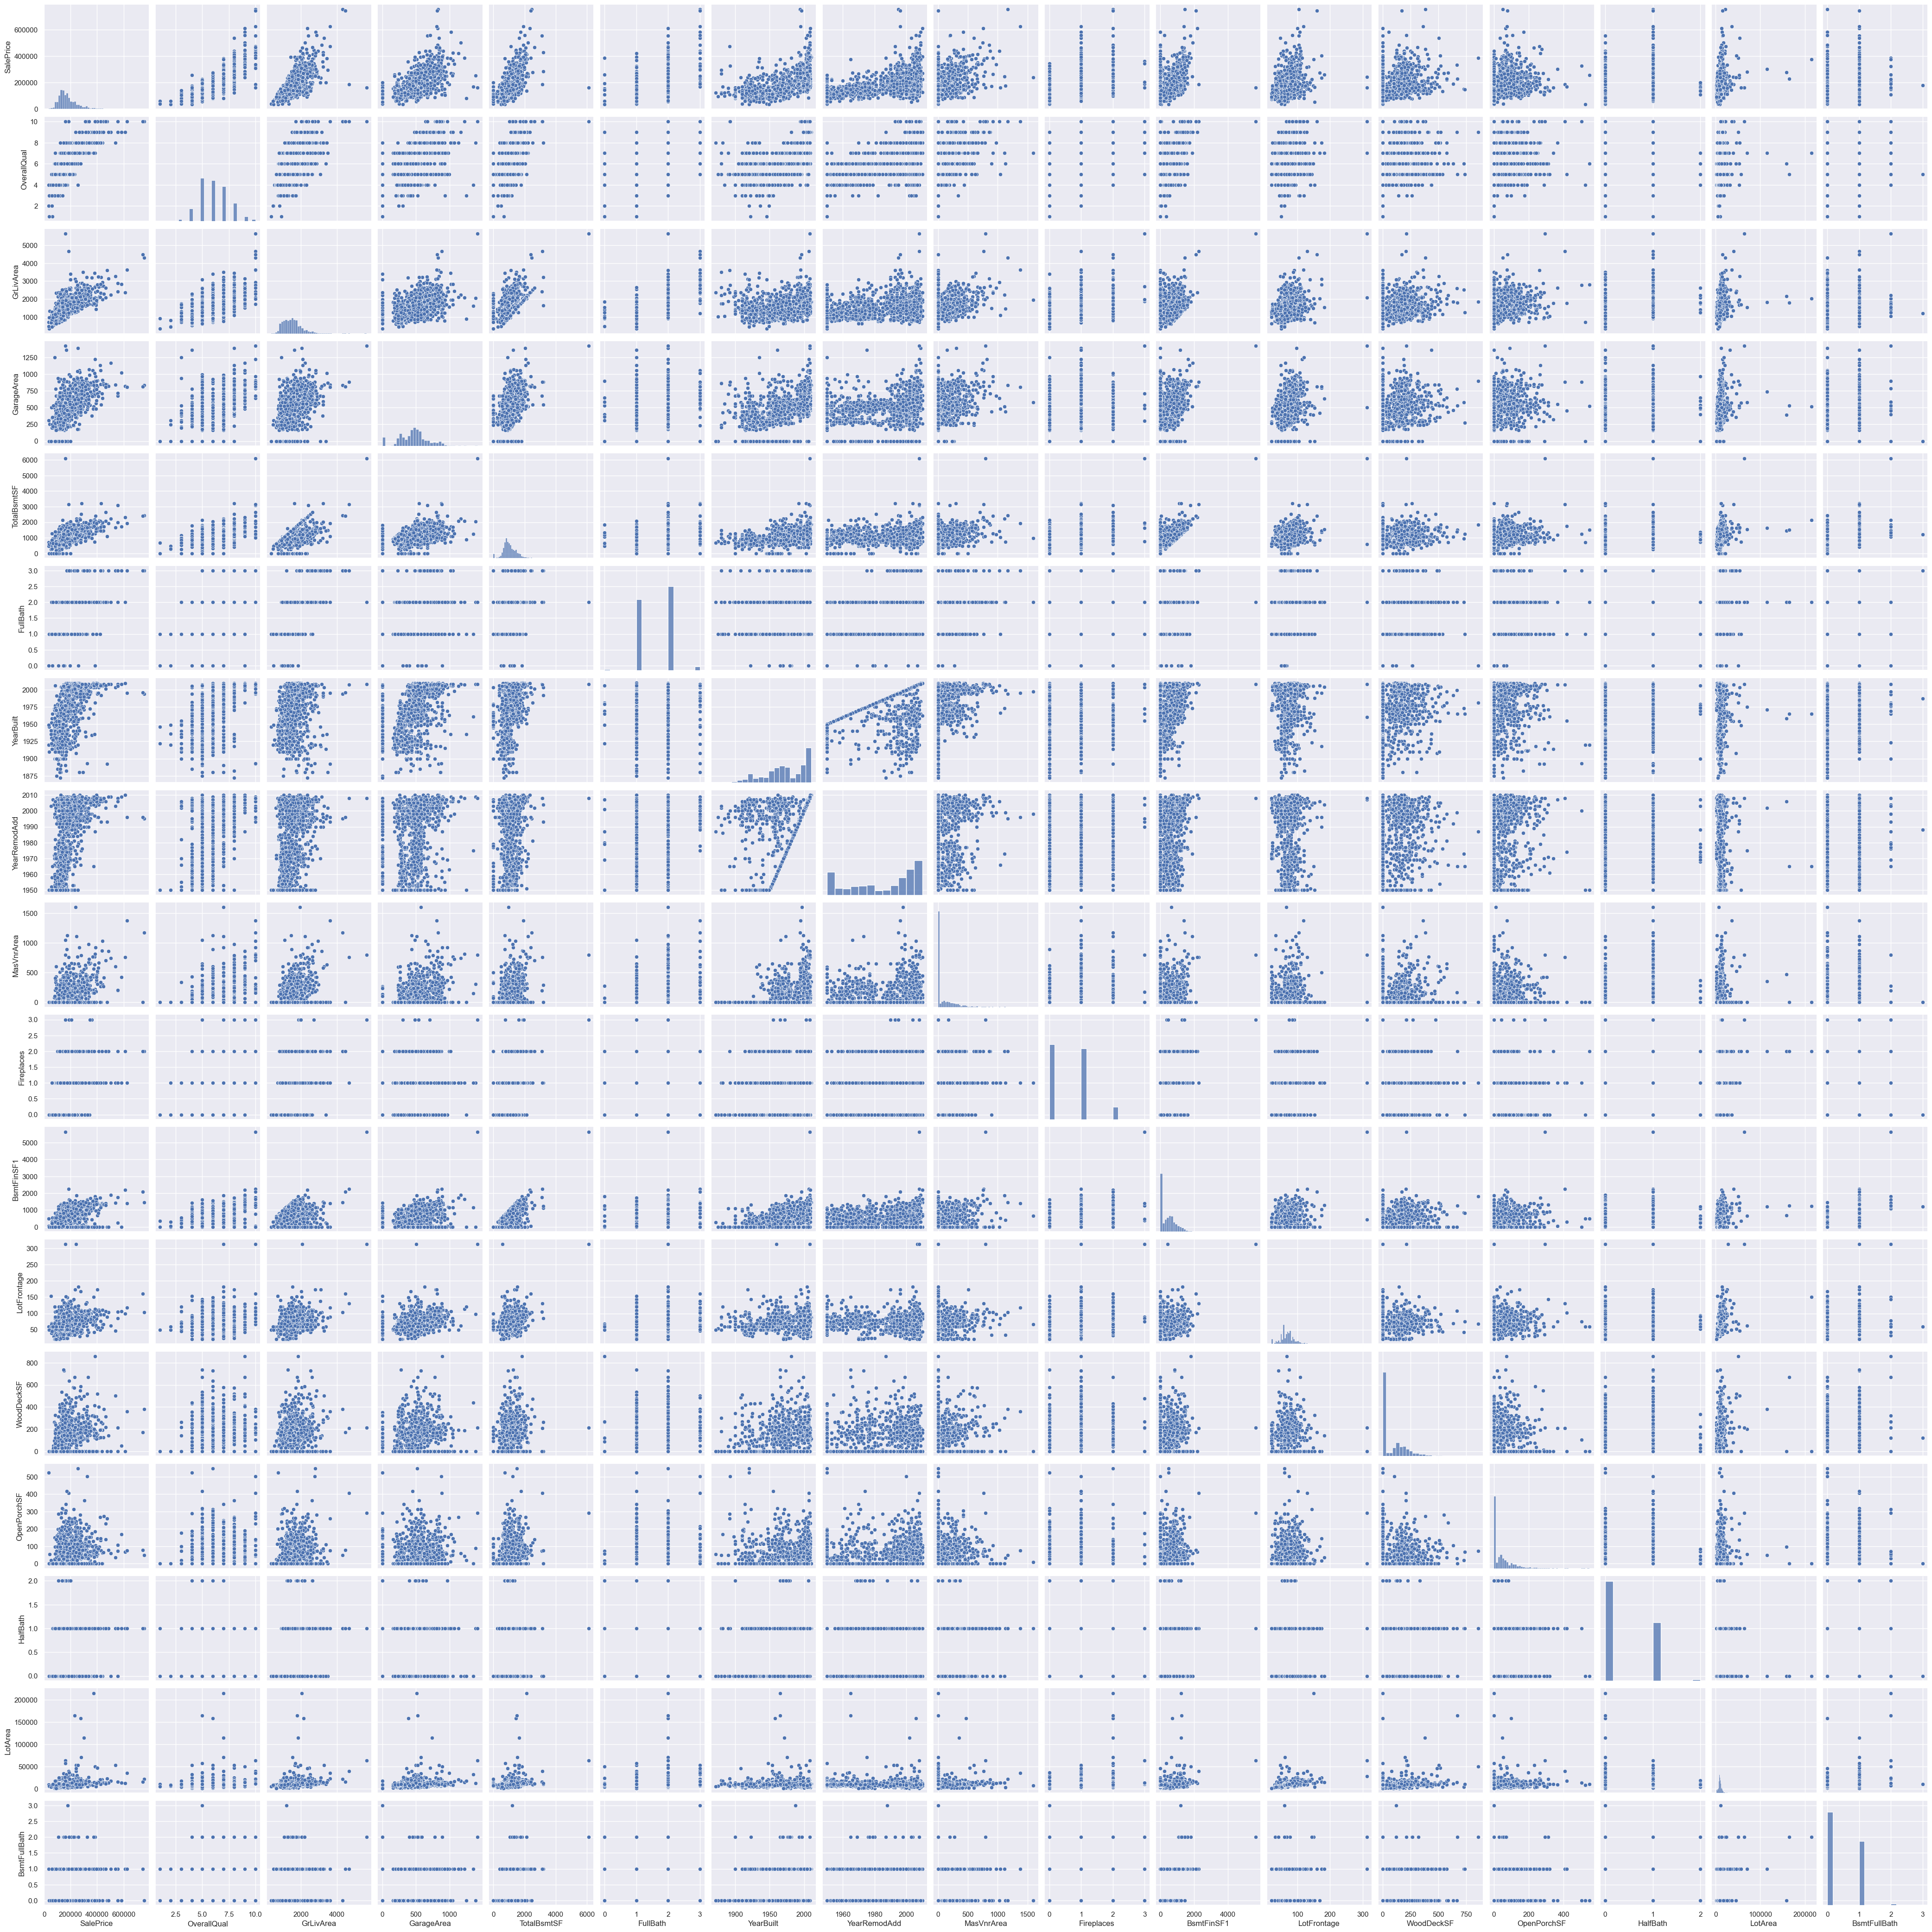

In [16]:
sns.pairplot(df, height=2.5)

In [17]:
# add the categorical values
df[cat] = df_train[cat]
df_[cat] = df_test[cat]

C:\Users\deauy\anaconda3\envs\TensorFlow\lib\site-packages\pandas\core\frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


## Check for missing values

In [18]:
df.isnull().sum()/df.shape[0]

SalePrice        0.000000
OverallQual      0.000000
GrLivArea        0.000000
GarageArea       0.000000
TotalBsmtSF      0.000000
FullBath         0.000000
YearBuilt        0.000000
YearRemodAdd     0.000000
MasVnrArea       0.005479
Fireplaces       0.000000
BsmtFinSF1       0.000000
LotFrontage      0.177397
WoodDeckSF       0.000000
OpenPorchSF      0.000000
HalfBath         0.000000
LotArea          0.000000
BsmtFullBath     0.000000
KitchenQual      0.000000
SaleCondition    0.000000
Neighborhood     0.000000
Utilities        0.000000
OverallCond      0.000000
CentralAir       0.000000
Electrical       0.000685
Heating          0.000000
Foundation       0.000000
SaleType         0.000000
PavedDrive       0.000000
BedroomAbvGr     0.000000
ExterQual        0.000000
ExterCond        0.000000
HouseStyle       0.000000
MSZoning         0.000000
Condition1       0.000000
Condition2       0.000000
BldgType         0.000000
Exterior1st      0.000000
Exterior2nd      0.000000
dtype: float

any column that has more than 15% of it's data missing will be dropped.

In [19]:
df.drop('LotFrontage', axis=1, inplace=True)

In [20]:
# drop the rows that have nan values
df.dropna(inplace=True)
df

SalePrice  OverallQual  GrLivArea  GarageArea  TotalBsmtSF  FullBath  \
0        208500            7       1710         548          856         2   
1        181500            6       1262         460         1262         2   
2        223500            7       1786         608          920         2   
3        140000            7       1717         642          756         1   
4        250000            8       2198         836         1145         2   
...         ...          ...        ...         ...          ...       ...   
1455     175000            6       1647         460          953         2   
1456     210000            6       2073         500         1542         2   
1457     266500            7       2340         252         1152         2   
1458     142125            5       1078         240         1078         1   
1459     147500            5       1256         276         1256         1   

      YearBuilt  YearRemodAdd  MasVnrArea  Fireplaces  ...  BedroomAbvGr  \
0          2003          2003       196.0           0  ...             3   
1          1976          1976         0.0           1  ...             3   
2          2001          2002       162.0           1  ...             3   
3          1915          1970         0.0           1  ...             3   
4          2000          2000       350.0           1  ...             4   
...         ...           ...         ...         ...  ...           ...   
1455       1999          2000         0.0           1  ...             3   
1456       1978          1988       119.0           2  ...             3   
1457       1941          2006         0.0           2  ...             4   
1458       1950          1996         0.0           0  ...             2   
1459       1965          1965         0.0           0  ...             3   

      ExterQual  ExterCond  HouseStyle  MSZoning  Condition1 Condition2  \
0            Gd         TA      2Story        RL        Norm       Norm   
1            TA         TA      1Story        RL       Feedr       Norm   
2            Gd         TA      2Story        RL        Norm       Norm   
3            TA         TA      2Story        RL        Norm       Norm   
4            Gd         TA      2Story        RL        Norm       Norm   
...         ...        ...         ...       ...         ...        ...   
1455         TA         TA      2Story        RL        Norm       Norm   
1456         TA         TA      1Story        RL        Norm       Norm   
1457         Ex         Gd      2Story        RL        Norm       Norm   
1458         TA         TA      1Story        RL        Norm       Norm   
1459         Gd         TA      1Story        RL        Norm       Norm   

     BldgType Exterior1st Exterior2nd  
0        1Fam     VinylSd     VinylSd  
1        1Fam     MetalSd     MetalSd  
2        1Fam     VinylSd     VinylSd  
3        1Fam     Wd Sdng     Wd Shng  
4        1Fam     VinylSd     VinylSd  
...       ...         ...         ...  
1455     1Fam     VinylSd     VinylSd  
1456     1Fam     Plywood     Plywood  
1457     1Fam     CemntBd     CmentBd  
1458     1Fam     MetalSd     MetalSd  
1459     1Fam     HdBoard     HdBoard  

[1451 rows x 37 columns]

In [21]:
df_.drop('LotFrontage', axis= 1, inplace=True)

C:\Users\deauy\anaconda3\envs\TensorFlow\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [22]:
df_['Id'] = df_test.Id

C:\Users\deauy\AppData\Local\Temp\ipykernel_7748\3387286178.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_['Id'] = df_test.Id


### check for outliers

<AxesSubplot:>

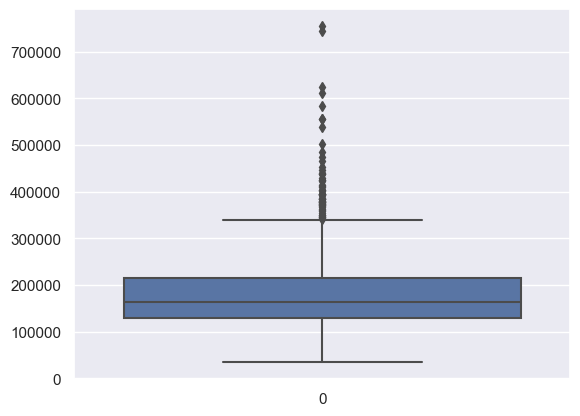

In [23]:
sns.boxplot(df.SalePrice)

there are a lot of outliers on the high side. but i'll ignore them for now

#### let's see how the data fares against our stongest variables

<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

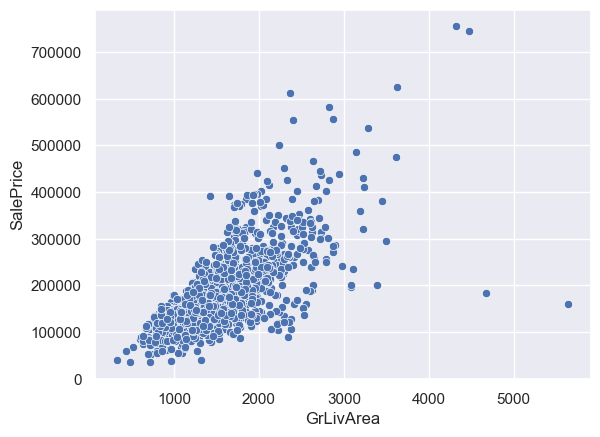

In [24]:
sns.scatterplot(df, x='GrLivArea', y='SalePrice')

there are 2 points to the right that doesn't follow the trend. it's also difficult to guess what happened there.
- i'll consider them as outliers and delete them.
- the two points at the very top probably the extreme points in our boxplot. they however follow the trend, so we'll keep them

In [25]:
df.sort_values(by='GrLivArea', ascending=False)[:4]

SalePrice  OverallQual  GrLivArea  GarageArea  TotalBsmtSF  FullBath  \
1298     160000           10       5642        1418         6110         2   
523      184750           10       4676         884         3138         3   
1182     745000           10       4476         813         2396         3   
691      755000           10       4316         832         2444         3   

      YearBuilt  YearRemodAdd  MasVnrArea  Fireplaces  ...  BedroomAbvGr  \
1298       2008          2008       796.0           3  ...             3   
523        2007          2008       762.0           1  ...             3   
1182       1996          1996         0.0           2  ...             4   
691        1994          1995      1170.0           2  ...             4   

      ExterQual  ExterCond  HouseStyle  MSZoning  Condition1 Condition2  \
1298         Ex         TA      2Story        RL       Feedr       Norm   
523          Ex         TA      2Story        RL        PosN       PosN   
1182         Gd         TA      2Story        RL        Norm       Norm   
691          Ex         TA      2Story        RL        Norm       Norm   

     BldgType Exterior1st Exterior2nd  
1298     1Fam      Stucco      Stucco  
523      1Fam     CemntBd     CmentBd  
1182     1Fam     Wd Sdng     ImStucc  
691      1Fam     HdBoard     HdBoard  

[4 rows x 37 columns]

the first two rows are what we're looking to drop

In [26]:
df.drop(df[df.index==1298].index, inplace=True)

In [27]:
df.drop(df[df.index==523].index, inplace=True)

<AxesSubplot:xlabel='TotalBsmtSF', ylabel='SalePrice'>

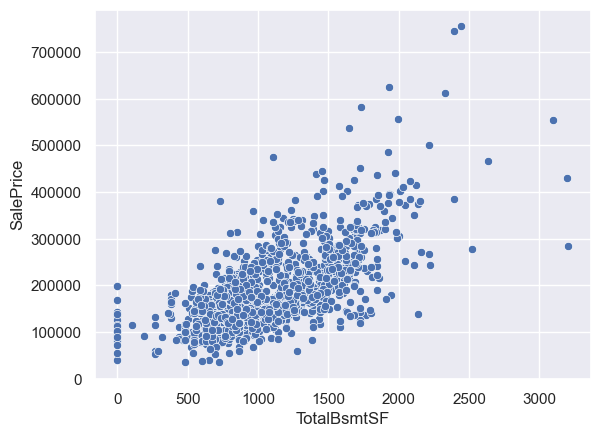

In [28]:
sns.scatterplot(df, x='TotalBsmtSF', y='SalePrice')

Everything looks good.

### our scatter plots of SalePrice with GrLivArea and TotalBsmtSF doesn't seem to follow the homoscedacity assumption. let's fix that.

- make data normally distributed if it's not already
- normally distributed data has homogeneous variances across.

<AxesSubplot:xlabel='SalePrice', ylabel='Count'>

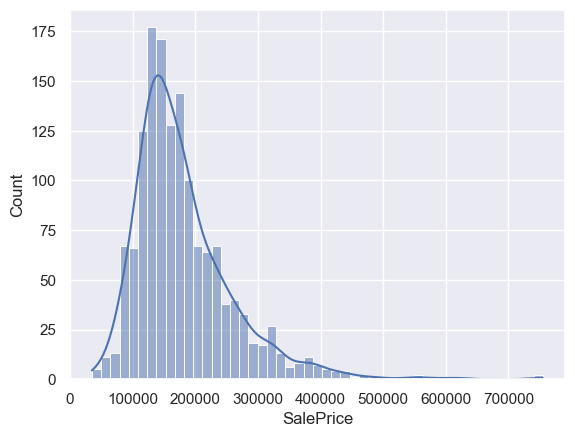

In [29]:
sns.histplot(df.SalePrice, kde=True)

the data seems to not be normally distributed. it has peakedness and positive skew
- check it's skew and kurtosis to confirm
- normally distributed datas have a kurtosis of 3

In [30]:
from scipy.stats import kurtosis, skew, probplot

In [31]:
skew(df.SalePrice)

1.8795851930580099

In [32]:
kurtosis(df.SalePrice, fisher=False)

9.532949371376645

#### our data is positively skewed, and has a kurtosis of 9.5 so our data is not normally distributed
- do a logarithmic transformation on the data to make it normally distributed

In [33]:
df.SalePrice = np.log(df.SalePrice)

#### rerunning the above cells, we can see that SalePrice is now normally distributed.

((array([-3.30301987, -3.04565945, -2.90252966, ...,  2.90252966,
          3.04565945,  3.30301987]),
  array([10.46024211, 10.47194981, 10.54270639, ..., 13.34550693,
         13.5211395 , 13.53447303])),
 (0.39856973033526416, 12.022343308304414, 0.9953497147216958))

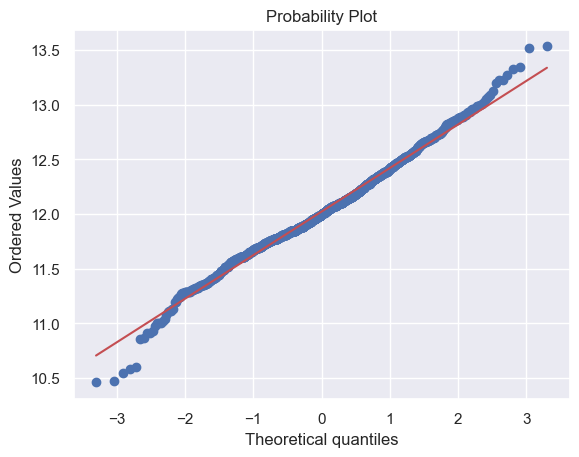

In [34]:
# check it's probplot
probplot(df.SalePrice, plot=plt)

it's linear so we're good

#### now let's check the variables

#### GrLivArea

<AxesSubplot:xlabel='GrLivArea', ylabel='Count'>

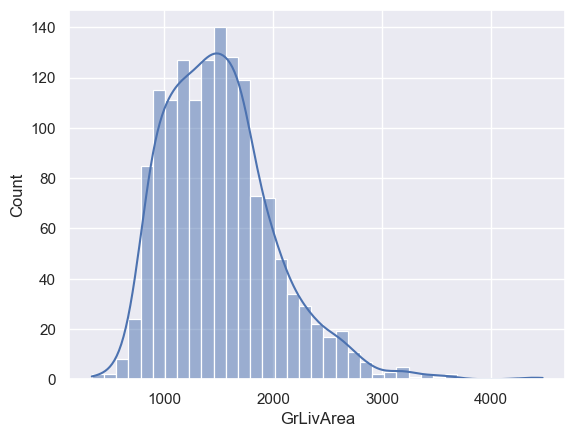

In [35]:
sns.histplot(df.GrLivArea, kde=True)

In [36]:
skew(df.GrLivArea), kurtosis(df.GrLivArea)

(1.015541253377165, 2.0730165492074653)

the kurtosis is good, but it still has a positive skew. so it's data is not close enough to being normally distributed.

we can check it's probability plot to confirm

((array([-3.30301987, -3.04565945, -2.90252966, ...,  2.90252966,
          3.04565945,  3.30301987]),
  array([ 334,  438,  480, ..., 3627, 4316, 4476], dtype=int64)),
 (495.76859478992213, 1509.143547273982, 0.9741381657938514))

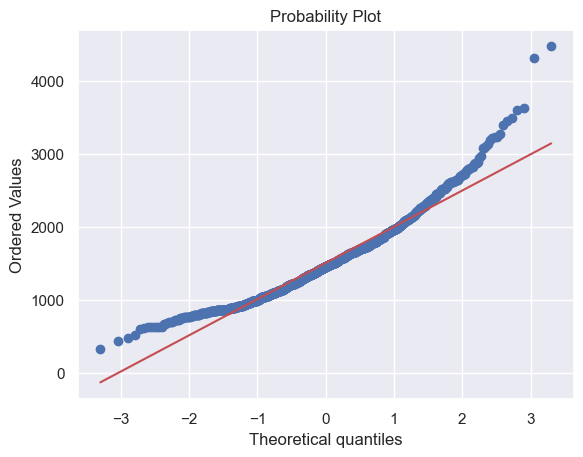

In [37]:
probplot(df.GrLivArea, plot=plt)

yes we were right.

let's do a logarithmic transformation on the data

In [38]:
df.GrLivArea = np.log(df.GrLivArea)
df_.GrLivArea = np.log(df_.GrLivArea)

C:\Users\deauy\anaconda3\envs\TensorFlow\lib\site-packages\pandas\core\generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


rerunning the above code; the probability plot becomes more linear. and the skew is minimal. so our data is now normally distributed

#### TotalBsmtSF

<AxesSubplot:xlabel='TotalBsmtSF', ylabel='Count'>

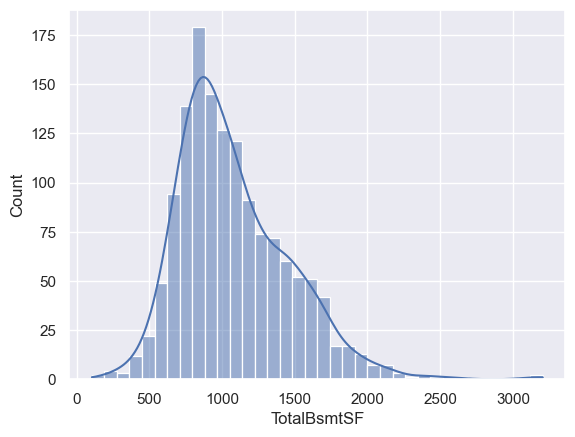

In [39]:
sns.histplot(df[df.TotalBsmtSF>0]['TotalBsmtSF'], kde=True)

((array([-3.29576125, -3.03787488, -2.89442031, ...,  2.89442031,
          3.03787488,  3.29576125]),
  array([ 105,  190,  264, ..., 3094, 3200, 3206], dtype=int64)),
 (372.808977723614, 1078.9362606232294, 0.9736055375859912))

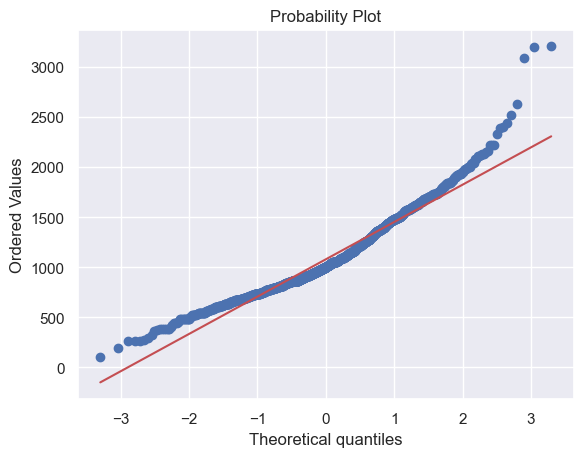

In [40]:
probplot(df[df.TotalBsmtSF>0]['TotalBsmtSF'], plot=plt)

In [41]:
skew(df.TotalBsmtSF), kurtosis(df.TotalBsmtSF)

(0.5092838734410978, 1.7886729799045513)

houses without basements are zero. so let's find a way to transform only the none=zero values

make a binary column for basment
df['HasBsmt'] = pd.Series(len(df['TotalBsmtSF']), index=df.index)
df['HasBsmt'] = 0
df.loc[df.TotalBsmtSF>0, 'HasBsmt'] = 1

In [42]:
# transform data
df.loc[df.TotalBsmtSF>0, 'TotalBsmtSF'] = np.log(df.TotalBsmtSF)
df_.loc[df_.TotalBsmtSF>0, 'TotalBsmtSF'] = np.log(df_.TotalBsmtSF)

C:\Users\deauy\anaconda3\envs\TensorFlow\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\deauy\anaconda3\envs\TensorFlow\lib\site-packages\pandas\core\indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


let's check if we were able to take care of the homoscedacity problem

<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

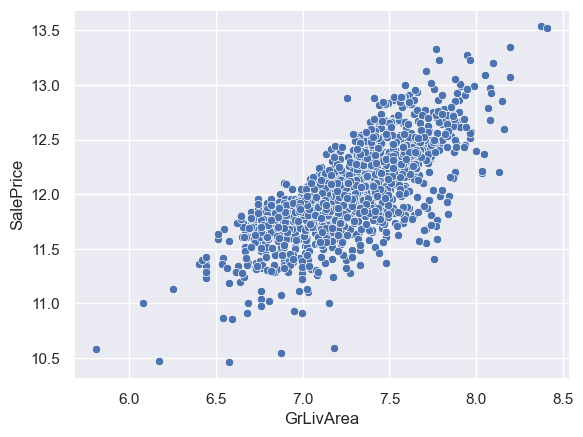

In [43]:
sns.scatterplot(df, x='GrLivArea', y='SalePrice')

<AxesSubplot:xlabel='TotalBsmtSF', ylabel='SalePrice'>

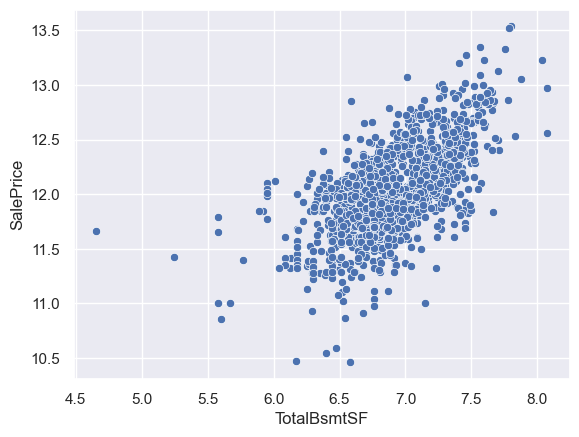

In [44]:
sns.scatterplot(df[df.TotalBsmtSF>0], x='TotalBsmtSF', y='SalePrice')

#### they have roughly equal variance across their range.

In [45]:
df.head()

SalePrice  OverallQual  GrLivArea  GarageArea  TotalBsmtSF  FullBath  \
0  12.247694            7   7.444249         548     6.752270         2   
1  12.109011            6   7.140453         460     7.140453         2   
2  12.317167            7   7.487734         608     6.824374         2   
3  11.849398            7   7.448334         642     6.628041         1   
4  12.429216            8   7.695303         836     7.043160         2   

   YearBuilt  YearRemodAdd  MasVnrArea  Fireplaces  ...  BedroomAbvGr  \
0       2003          2003       196.0           0  ...             3   
1       1976          1976         0.0           1  ...             3   
2       2001          2002       162.0           1  ...             3   
3       1915          1970         0.0           1  ...             3   
4       2000          2000       350.0           1  ...             4   

   ExterQual  ExterCond  HouseStyle  MSZoning  Condition1 Condition2 BldgType  \
0         Gd         TA      2Story        RL        Norm       Norm     1Fam   
1         TA         TA      1Story        RL       Feedr       Norm     1Fam   
2         Gd         TA      2Story        RL        Norm       Norm     1Fam   
3         TA         TA      2Story        RL        Norm       Norm     1Fam   
4         Gd         TA      2Story        RL        Norm       Norm     1Fam   

  Exterior1st Exterior2nd  
0     VinylSd     VinylSd  
1     MetalSd     MetalSd  
2     VinylSd     VinylSd  
3     Wd Sdng     Wd Shng  
4     VinylSd     VinylSd  

[5 rows x 37 columns]

#### GarageArea

<AxesSubplot:xlabel='GarageArea', ylabel='SalePrice'>

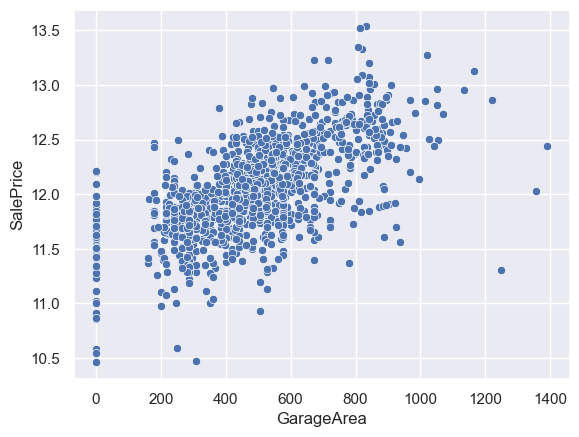

In [46]:
sns.scatterplot(y=df.SalePrice, x=df.GarageArea)

<AxesSubplot:xlabel='GarageArea', ylabel='Count'>

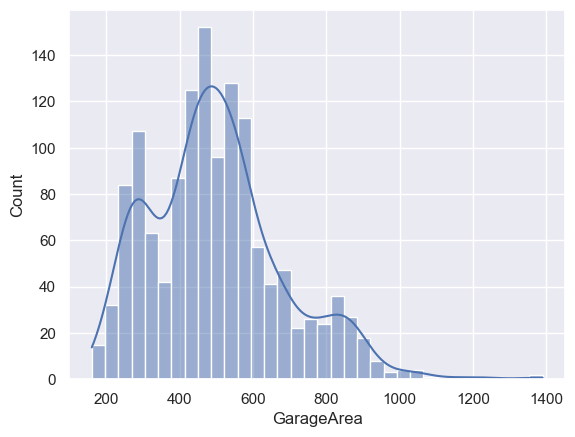

In [47]:
sns.histplot(df.loc[df['GarageArea']>0, 'GarageArea'], kde=True)

((array([-3.28685875, -3.02832444, -2.88446949, ...,  2.88446949,
          3.02832444,  3.28685875]),
  array([ 160,  160,  164, ..., 1248, 1356, 1390], dtype=int64)),
 (180.82769546731643, 499.5116959064328, 0.9801498618158998))

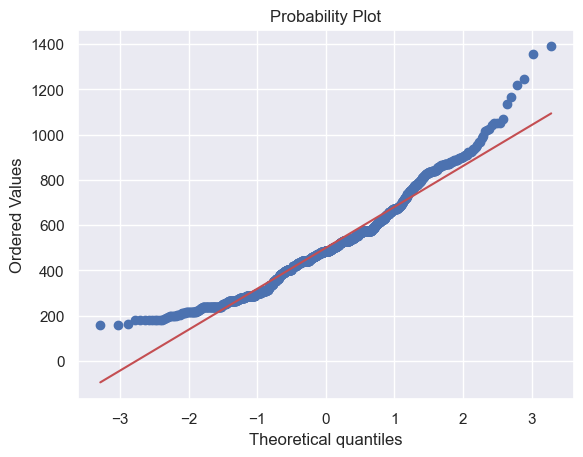

In [48]:
probplot(df.loc[df['GarageArea']>0, 'GarageArea'], plot = plt)

In [49]:
skew(df.loc[df['GarageArea']>0, 'GarageArea']), kurtosis(df.loc[df['GarageArea']>0, 'GarageArea'])

(0.7553651606401143, 0.9013346925407246)

df['HasGarage'] = pd.Series(len(df.GarageArea),index=df.index)
df['HasGarage'] = 0
df.loc[df.GarageArea>0, 'HasGarage'] = 1

In [50]:
df.loc[df['GarageArea']>0,'GarageArea'] = np.sqrt(df['GarageArea'])
df_.loc[df_['GarageArea']>0,'GarageArea'] = np.sqrt(df_['GarageArea'])

C:\Users\deauy\anaconda3\envs\TensorFlow\lib\site-packages\pandas\core\indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


the square root transformation made it closer to a normal distribution

#### MasVnrArea

<AxesSubplot:xlabel='MasVnrArea', ylabel='SalePrice'>

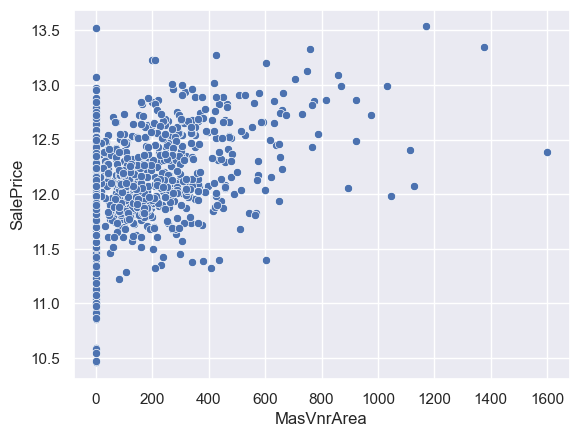

In [51]:
sns.scatterplot(y=df.SalePrice, x=df.MasVnrArea)

<AxesSubplot:xlabel='MasVnrArea', ylabel='Count'>

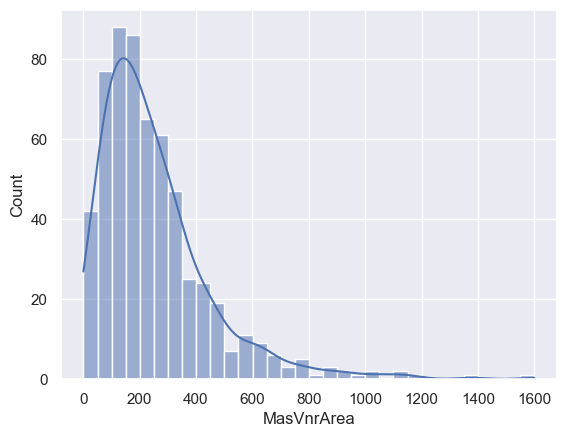

In [52]:
sns.histplot(df[df.MasVnrArea>0]['MasVnrArea'], kde=True)

((array([-3.04172635, -2.76401252, -2.60816082, -2.49780474, -2.41143272,
         -2.3400053 , -2.27883377, -2.225161  , -2.17722325, -2.13382147,
         -2.09410217, -2.0574354 , -2.02334252, -1.99145099, -1.96146494,
         -1.93314535, -1.90629628, -1.88075496, -1.85638471, -1.83306957,
         -1.8107103 , -1.78922125, -1.76852801, -1.74856549, -1.72927639,
         -1.71061005, -1.69252139, -1.67497015, -1.65792022, -1.64133905,
         -1.62519725, -1.60946813, -1.5941274 , -1.57915292, -1.5645244 ,
         -1.55022321, -1.53623223, -1.52253566, -1.50911891, -1.49596843,
         -1.48307169, -1.47041701, -1.45799352, -1.44579106, -1.43380017,
         -1.42201196, -1.41041811, -1.3990108 , -1.38778269, -1.37672686,
         -1.3658368 , -1.35510635, -1.3445297 , -1.33410136, -1.32381611,
         -1.31366903, -1.30365544, -1.29377088, -1.28401115, -1.2743722 ,
         -1.26485023, -1.25544158, -1.24614277, -1.23695047, -1.22786153,
         -1.2188729 , -1.20998169, -1.

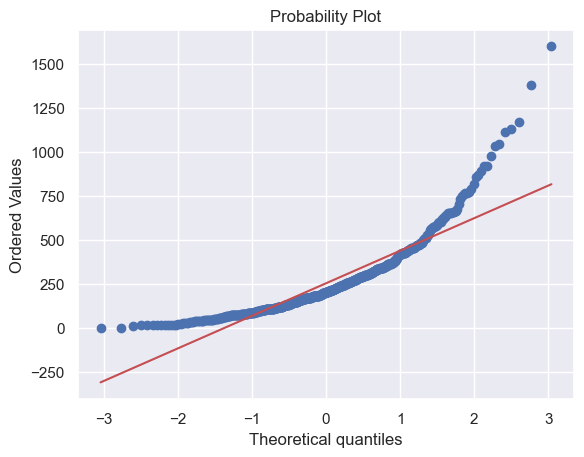

In [53]:
probplot(df.loc[df['MasVnrArea']>0, 'MasVnrArea'], plot=plt)

In [54]:
skew(df.MasVnrArea), kurtosis(df.MasVnrArea)

(2.683932641474257, 10.310947678577948)

df['HasMasVnr'] = pd.Series(0, index=df.index)
df.loc[df.MasVnrArea>0, 'HasMasVnr'] = 1

In [55]:
df.loc[df['MasVnrArea']>0, 'MasVnrArea'] = np.sqrt(df['MasVnrArea'])
df_.loc[df_['MasVnrArea']>0, 'MasVnrArea'] = np.sqrt(df_['MasVnrArea'])

C:\Users\deauy\anaconda3\envs\TensorFlow\lib\site-packages\pandas\core\indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


rerunning our hisplot and probplot shows that our data got closer to being normally distributed after the square-root transformation

### BsmtFinSF1

<AxesSubplot:xlabel='BsmtFinSF1', ylabel='SalePrice'>

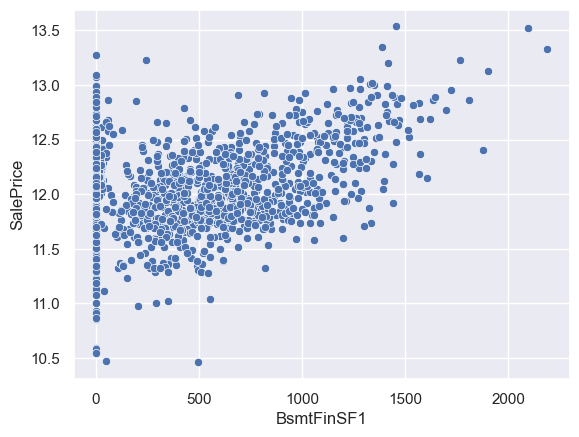

In [56]:
sns.scatterplot(x=df.BsmtFinSF1, y=df.SalePrice)

<AxesSubplot:xlabel='BsmtFinSF1', ylabel='Count'>

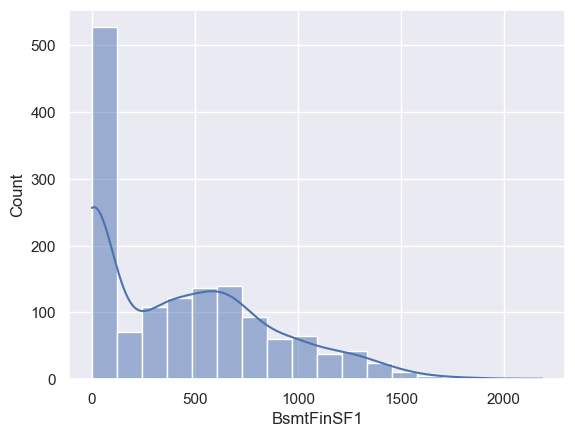

In [57]:
sns.histplot(df.BsmtFinSF1, kde=True)

((array([-3.19322959e+00, -2.92768319e+00, -2.77947509e+00, -2.67493439e+00,
         -2.59336833e+00, -2.52609596e+00, -2.46862039e+00, -2.41830020e+00,
         -2.37344722e+00, -2.33291483e+00, -2.29588739e+00, -2.26176340e+00,
         -2.23008606e+00, -2.20050007e+00, -2.17272342e+00, -2.14652841e+00,
         -2.12172844e+00, -2.09816861e+00, -2.07571888e+00, -2.05426900e+00,
         -2.03372462e+00, -2.01400439e+00, -1.99503761e+00, -1.97676250e+00,
         -1.95912468e+00, -1.94207607e+00, -1.92557393e+00, -1.90958009e+00,
         -1.89406030e+00, -1.87898376e+00, -1.86432260e+00, -1.85005155e+00,
         -1.83614764e+00, -1.82258988e+00, -1.80935909e+00, -1.79643766e+00,
         -1.78380939e+00, -1.77145934e+00, -1.75937372e+00, -1.74753974e+00,
         -1.73594555e+00, -1.72458013e+00, -1.71343320e+00, -1.70249520e+00,
         -1.69175718e+00, -1.68121075e+00, -1.67084807e+00, -1.66066177e+00,
         -1.65064492e+00, -1.64079101e+00, -1.63109389e+00, -1.62154777e+00,

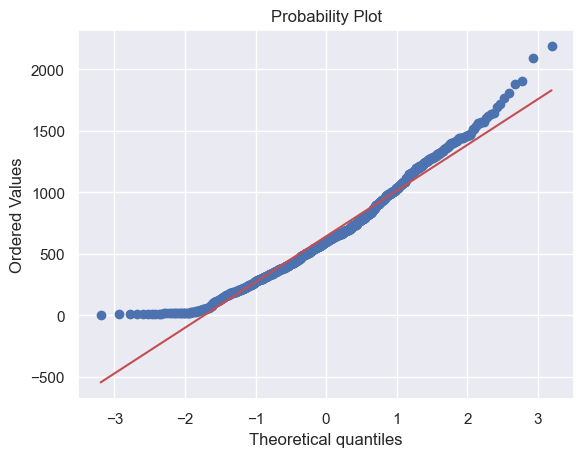

In [58]:
probplot(df.loc[df.BsmtFinSF1>0,'BsmtFinSF1'], plot=plt)

In [59]:
df.BsmtFinSF1 = np.sqrt(df.BsmtFinSF1)

everything looks good, let's move on to the last one.

#### WoodDeckSF

<AxesSubplot:xlabel='WoodDeckSF', ylabel='SalePrice'>

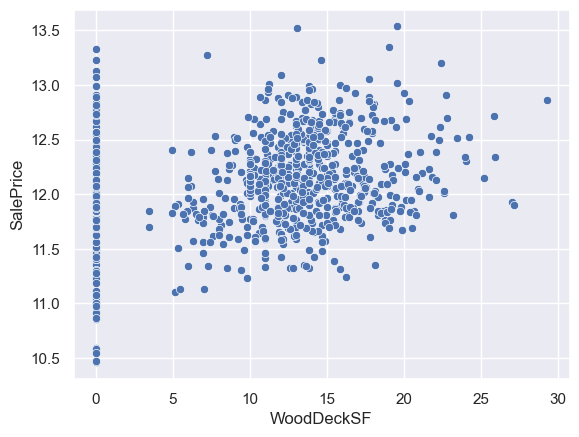

In [60]:
sns.scatterplot(x=np.sqrt(df.WoodDeckSF), y=df.SalePrice)

<AxesSubplot:xlabel='WoodDeckSF', ylabel='Count'>

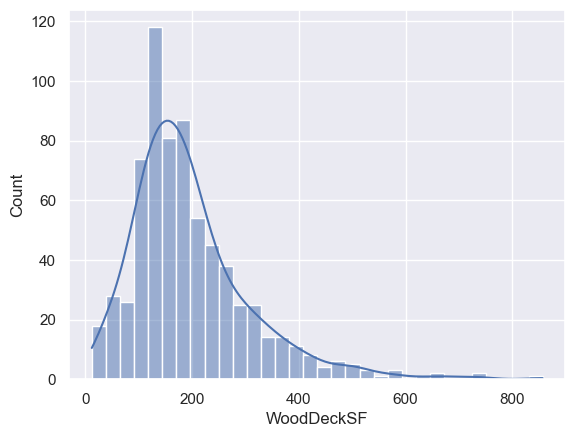

In [61]:
sns.histplot(df.loc[df.WoodDeckSF>0, 'WoodDeckSF'], kde=True)

((array([-3.09074575e+00, -2.81708602e+00, -2.66379410e+00, -2.55539245e+00,
         -2.47064023e+00, -2.40061666e+00, -2.34069659e+00, -2.28816127e+00,
         -2.24127201e+00, -2.19884718e+00, -2.16004585e+00, -2.12424754e+00,
         -2.09098087e+00, -2.05987901e+00, -2.03065073e+00, -2.00306076e+00,
         -1.97691626e+00, -1.95205709e+00, -1.92834880e+00, -1.90567730e+00,
         -1.88394500e+00, -1.86306768e+00, -1.84297217e+00, -1.82359447e+00,
         -1.80487827e+00, -1.78677376e+00, -1.76923664e+00, -1.75222736e+00,
         -1.73571041e+00, -1.71965385e+00, -1.70402878e+00, -1.68880899e+00,
         -1.67397064e+00, -1.65949196e+00, -1.64535304e+00, -1.63153558e+00,
         -1.61802279e+00, -1.60479913e+00, -1.59185029e+00, -1.57916299e+00,
         -1.56672491e+00, -1.55452459e+00, -1.54255137e+00, -1.53079529e+00,
         -1.51924705e+00, -1.50789793e+00, -1.49673978e+00, -1.48576492e+00,
         -1.47496616e+00, -1.46433671e+00, -1.45387018e+00, -1.44356055e+00,

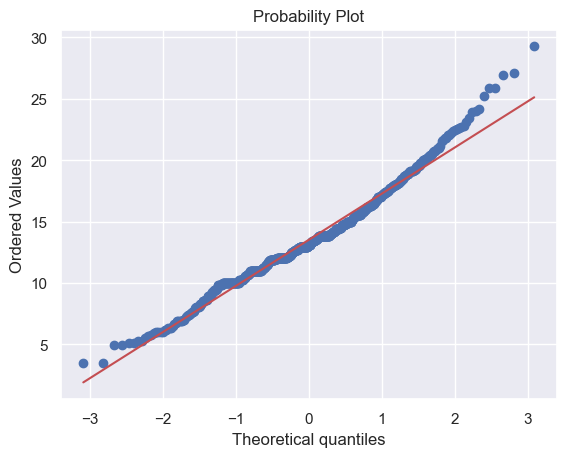

In [62]:
probplot(np.sqrt(df.loc[df.WoodDeckSF>0, 'WoodDeckSF']), plot=plt)

df['HasWoodDeck'] = pd.Series(0, index=df.index)
df.loc[df.WoodDeckSF>0, 'HasWoodDeck'] = 1

In [63]:
df.loc[df['WoodDeckSF']>0, 'WoodDeckSF'] = np.sqrt(df.WoodDeckSF)
df_.loc[df_['WoodDeckSF']>0, 'WoodDeckSF'] = np.sqrt(df_.WoodDeckSF)

C:\Users\deauy\anaconda3\envs\TensorFlow\lib\site-packages\pandas\core\indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


#### OpenPorchSF

<AxesSubplot:xlabel='OpenPorchSF', ylabel='SalePrice'>

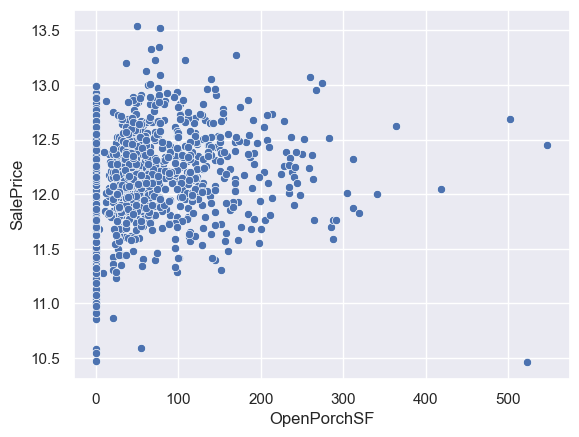

In [64]:
sns.scatterplot(y=df.SalePrice, x=df.OpenPorchSF)

((array([-3.13121987e+00, -2.86082146e+00, -2.70957926e+00, -2.60273756e+00,
         -2.51927482e+00, -2.45036632e+00, -2.39143828e+00, -2.33980295e+00,
         -2.29374191e+00, -2.25208756e+00, -2.21400914e+00, -2.17889376e+00,
         -2.14627590e+00, -2.11579338e+00, -2.08715866e+00, -2.06013950e+00,
         -2.03454558e+00, -2.01021887e+00, -1.98702668e+00, -1.96485648e+00,
         -1.94361196e+00, -1.92321006e+00, -1.90357862e+00, -1.88465452e+00,
         -1.86638223e+00, -1.84871263e+00, -1.83160206e+00, -1.81501151e+00,
         -1.79890599e+00, -1.78325401e+00, -1.76802709e+00, -1.75319940e+00,
         -1.73874744e+00, -1.72464977e+00, -1.71088676e+00, -1.69744039e+00,
         -1.68429411e+00, -1.67143264e+00, -1.65884185e+00, -1.64650867e+00,
         -1.63442097e+00, -1.62256747e+00, -1.61093766e+00, -1.59952175e+00,
         -1.58831055e+00, -1.57729552e+00, -1.56646860e+00, -1.55582225e+00,
         -1.54534938e+00, -1.53504332e+00, -1.52489777e+00, -1.51490679e+00,

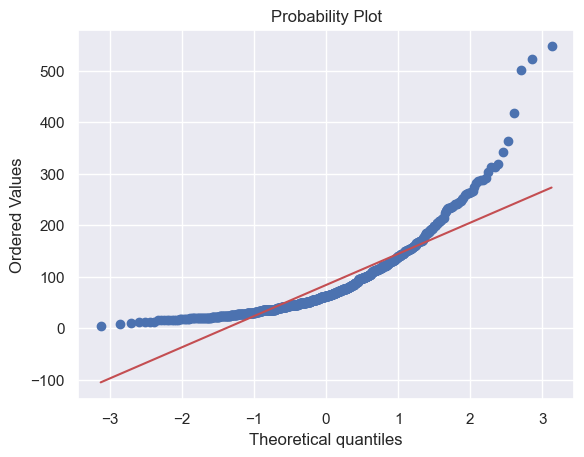

In [65]:
probplot(df.loc[df.OpenPorchSF>0, 'OpenPorchSF'], plot=plt)

In [66]:
df.loc[df.OpenPorchSF>0, 'OpenPorchSF'] = np.log(df.OpenPorchSF)
df_.loc[df_.OpenPorchSF>0, 'OpenPorchSF'] = np.log(df_.OpenPorchSF)

C:\Users\deauy\anaconda3\envs\TensorFlow\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\deauy\anaconda3\envs\TensorFlow\lib\site-packages\pandas\core\indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


log transformation made it more normally distributed

#### LotArea

<AxesSubplot:xlabel='LotArea', ylabel='SalePrice'>

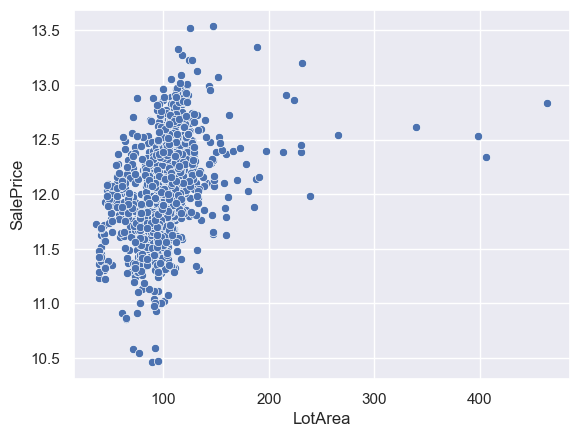

In [67]:
sns.scatterplot(y=df.SalePrice, x=np.sqrt(df.LotArea))

((array([-3.30301987, -3.04565945, -2.90252966, ...,  2.90252966,
          3.04565945,  3.30301987]),
  array([ 7.17011954,  7.29776828,  7.30720231, ..., 11.97665948,
         12.01163802, 12.27953219])),
 (0.4890341469553416, 9.10764321560523, 0.9504193727421089))

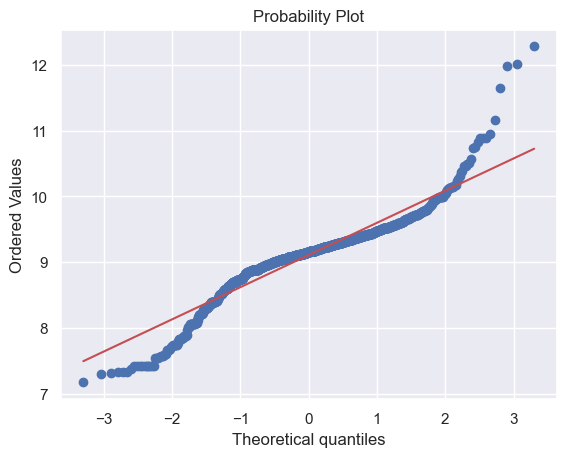

In [68]:
probplot(np.log(df.loc[df.LotArea>0, 'LotArea']), plot=plt)

In [69]:
skew(np.log(df.LotArea)), kurtosis(np.log(df.LotArea))

(-0.18721050692318247, 4.752187875531925)

In [70]:
df.loc[df.LotArea>0, 'LotArea'] = np.log(df.LotArea)
df_.loc[df_.LotArea>0, 'LotArea'] = np.log(df_.LotArea)

C:\Users\deauy\anaconda3\envs\TensorFlow\lib\site-packages\pandas\core\indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


### encode the categorical variables

In [71]:
def target_encode(col):
    avg = df.groupby(col)['SalePrice'].mean()
    return df[col].map(avg)

In [72]:
cat

['KitchenQual',
 'SaleCondition',
 'Neighborhood',
 'Utilities',
 'OverallCond',
 'CentralAir',
 'Electrical',
 'Heating',
 'Foundation',
 'SaleType',
 'PavedDrive',
 'BedroomAbvGr',
 'ExterQual',
 'ExterCond',
 'HouseStyle',
 'MSZoning',
 'Condition1',
 'Condition2',
 'BldgType',
 'Exterior1st',
 'Exterior2nd']

In [73]:
cat.remove('OverallCond')

In [74]:
for col in cat:
    df.loc[:, col+'target_encoded'] = target_encode(col)
    df_.loc[:, col+'target_encoded'] = target_encode(col)
    df.drop(col, axis=1, inplace=True)
    df_.drop(col, axis=1, inplace=True)

C:\Users\deauy\anaconda3\envs\TensorFlow\lib\site-packages\pandas\core\indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
C:\Users\deauy\anaconda3\envs\TensorFlow\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


# Regression models

In [75]:
from sklearn.linear_model import LinearRegression, ElasticNet, BayesianRidge
from sklearn.ensemble import RandomForestRegressor

In [76]:
def adj_r2_score(x_train, y_test, y_preds):
    SS_reg = np.sum((y_test - y_preds)**2)
    SS_total = np.sum((y_test - np.mean(y_test))**2)
    r2 = 1-SS_reg/SS_total
    
    N = len(x_train)
    p = len(x_train.columns)
    
    adj_r2 = 1-((1-r2)*(N-1))/(N-p-1)
    return adj_r2


In [77]:
# regression function
def pred_model(model, x_train, y_train, pred_data):
    reg = model()
    reg.fit(x_train, y_train)
    
    pred = reg.predict(pred_data)
    return pd.Series(pred)

In [78]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, accuracy_score
from sklearn.model_selection import train_test_split

#### quick feature selection

In [79]:
df.columns

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageArea', 'TotalBsmtSF',
       'FullBath', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'Fireplaces',
       'BsmtFinSF1', 'WoodDeckSF', 'OpenPorchSF', 'HalfBath', 'LotArea',
       'BsmtFullBath', 'OverallCond', 'KitchenQualtarget_encoded',
       'SaleConditiontarget_encoded', 'Neighborhoodtarget_encoded',
       'Utilitiestarget_encoded', 'CentralAirtarget_encoded',
       'Electricaltarget_encoded', 'Heatingtarget_encoded',
       'Foundationtarget_encoded', 'SaleTypetarget_encoded',
       'PavedDrivetarget_encoded', 'BedroomAbvGrtarget_encoded',
       'ExterQualtarget_encoded', 'ExterCondtarget_encoded',
       'HouseStyletarget_encoded', 'MSZoningtarget_encoded',
       'Condition1target_encoded', 'Condition2target_encoded',
       'BldgTypetarget_encoded', 'Exterior1sttarget_encoded',
       'Exterior2ndtarget_encoded'],
      dtype='object')

In [80]:
from sklearn.feature_selection import f_regression

In [81]:
select = f_regression(df.drop('SalePrice', axis=1), df.SalePrice)

In [82]:
# pvalues on the second array
select

(array([2.98923603e+03, 1.72887876e+03, 8.50045557e+02, 2.33695592e+02,
        8.00781297e+02, 7.59532561e+02, 6.80806230e+02, 3.62301922e+02,
        4.66633259e+02, 1.45127017e+02, 2.09546906e+02, 3.88815682e+02,
        1.56544723e+02, 2.81457182e+02, 8.45364511e+01, 1.73497919e+00,
        1.17958527e+03, 2.14563842e+02, 1.92671655e+03, 2.28222691e-01,
        2.04137147e+02, 1.54302807e+02, 4.93409173e+01, 6.29220968e+02,
        1.97668695e+02, 1.48505553e+02, 1.14491839e+02, 1.24939978e+03,
        6.88118185e+01, 1.65216182e+02, 3.08371130e+02, 6.41177319e+01,
        1.93436193e+01, 6.01159982e+01, 3.19169080e+02, 2.97458730e+02]),
 array([0.00000000e+000, 2.84361056e-249, 2.13676203e-147, 5.07995825e-049,
        1.41297880e-140, 9.48843192e-135, 2.56197830e-123, 2.88007405e-072,
        6.32926248e-090, 6.41083160e-032, 1.87769278e-044, 7.51988512e-077,
        3.52328369e-034, 7.36534456e-058, 1.27361679e-019, 1.87984795e-001,
        1.45990155e-189, 2.08459502e-045, 2.85

In [83]:
'Condition2target_encoded',

('Condition2target_encoded',)

x = df.drop(['SalePrice', 'YearRemodAdd','MasVnrArea', 'OverallCond','PavedDrivetarget_encoded',
             'BedroomAbvGrtarget_encoded', 'HouseStyletarget_encoded','ExterCondtarget_encoded',
            'Utilitiestarget_encoded',], axis=1)
y = df.SalePrice

In [84]:
x = df.drop(['SalePrice', 'OverallCond','Heatingtarget_encoded', 'BldgTypetarget_encoded','Condition1target_encoded','ExterCondtarget_encoded',
            'Condition2target_encoded','Utilitiestarget_encoded'], axis=1)
y = df.SalePrice

In [85]:
# drop columns from our test data also
df_ = df_.drop(['OverallCond','Heatingtarget_encoded', 'BldgTypetarget_encoded','Condition1target_encoded','ExterCondtarget_encoded',
            'Condition2target_encoded','Utilitiestarget_encoded'], axis=1)

x = df[['OverallQual', 'GrLivArea', 'TotalBsmtSF', 'GarageArea', 'YearBuilt', 'FullBath', 'Fireplaces', 'WoodDeckSF',
       'OpenPorchSF','HalfBath', 'LotArea', 'BsmtFullBath']]
y = df.SalePrice

In [86]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=27, shuffle=True)

#### linear regression

In [87]:
pred = pred_model(LinearRegression, x_train, y_train, x_test)

In [88]:
print('MAE: ',mean_absolute_error(y_test, pred))
print('MSE: ',mean_squared_error(y_test, pred))
print('R2: ',r2_score(y_test, pred))

MAE:  0.09184268366260649
MSE:  0.015075363361912045
R2:  0.8928935274183483


In [89]:
adj_r2_score(x_train, y_test, pred)

0.7618352514215259

#### elasticnet

In [90]:
pred = pred_model(ElasticNet, x_train, y_train, x_test)

In [91]:
print('MAE: ',mean_absolute_error(y_test, pred))
print('MSE: ',mean_squared_error(y_test, pred))
print('R2: ',r2_score(y_test, pred))

MAE:  0.19140932380160885
MSE:  0.06687131050633635
R2:  0.5248970115478788


In [92]:
adj_r2_score(x_train, y_test, pred)

0.8285685498945237

the adjusted r2 is greater than r2. so the elasticnet model might be having a hard time interpreting my features

#### BayesianRidge regression

In [93]:
pred = pred_model(BayesianRidge, x_train, y_train, x_test)

In [94]:
print('MAE: ',mean_absolute_error(y_test, pred))
print('MSE: ',mean_squared_error(y_test, pred))
print('R2: ',r2_score(y_test, pred))

MAE:  0.0919131264964738
MSE:  0.015083213652409375
R2:  0.8928377531790331


In [95]:
adj_r2_score(x_train, y_test, pred)

0.7611644130542542

### RandomForest

In [96]:
pred = pred_model(RandomForestRegressor, x_train, y_train, x_test)

In [97]:
print('MAE: ',mean_absolute_error(y_test, pred))
print('MSE: ',mean_squared_error(y_test, pred))
print('R2: ',r2_score(y_test, pred))

MAE:  0.09031814948246626
MSE:  0.01515341036190852
R2:  0.8923390241095709


In [98]:
adj_r2_score(x_train, y_test, pred)

0.7632463830463038

### ARDRegressor, HuberRegressor, Lasso

In [99]:
from sklearn.linear_model import ARDRegression, HuberRegressor, Lasso

In [100]:
# ARD
pred = pred_model(ARDRegression, x_train, y_train, x_test)
print('MAE: ',mean_absolute_error(y_test, pred))
print('MSE: ',mean_squared_error(y_test, pred))
print('R2: ',r2_score(y_test, pred))
adj_r2_score(x_train, y_test, pred)

MAE:  0.100546732417645
MSE:  0.017560824553936517
R2:  0.875234982504671


0.7701924991696765

In [101]:
# Huber
pred = pred_model(HuberRegressor, x_train, y_train, x_test)
print('MAE: ',mean_absolute_error(y_test, pred))
print('MSE: ',mean_squared_error(y_test, pred))
print('R2: ',r2_score(y_test, pred))
adj_r2_score(x_train, y_test, pred)

MAE:  0.22037112419312366
MSE:  0.07793003931277015
R2:  0.44632766596999573


C:\Users\deauy\anaconda3\envs\TensorFlow\lib\site-packages\sklearn\linear_model\_huber.py:332: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


0.5674011478372958

In [102]:
# lasso
pred = pred_model(Lasso, x_train, y_train, x_test)
print('MAE: ',mean_absolute_error(y_test, pred))
print('MSE: ',mean_squared_error(y_test, pred))
print('R2: ',r2_score(y_test, pred))
adj_r2_score(x_train, y_test, pred)

MAE:  0.21449423558066832
MSE:  0.08558477586914856
R2:  0.39194278572446084


0.8433829926152328

# Tune their Hyperparaameters

In [105]:
from sklearn.model_selection import GridSearchCV
from skopt import BayesSearchCV
from sklearn.model_selection import RandomizedSearchCV

#### ARDRegression

In [106]:
from scipy.stats import uniform

In [107]:
# Create the ARDRegression model
model = ARDRegression()

# Define the hyperparameter search space
param_grid = {
    'alpha_1': uniform(0, 10),
    'alpha_2': uniform(0, 10),
    'lambda_1': uniform(0, 10),
    'lambda_2': uniform(0, 10)
}

# Create the RandomizedSearchCV object
search = RandomizedSearchCV(model, param_distributions=param_grid, n_iter=100, scoring='neg_mean_squared_error', random_state=42, cv=5)

# Perform the hyperparameter search
search.fit(x_train, y_train)

# Get the best model and its hyperparameters
best_model = search.best_estimator_
best_params = search.best_params_

# Make predictions using the best model
y_pred = best_model.predict(x_test)

# Calculate the MSE
mse = mean_squared_error(y_test, y_pred)
print("Best Model MSE:", mse)
print("Best Model Hyperparameters:", best_params)

Best Model MSE: 0.015090461322355433
Best Model Hyperparameters: {'alpha_1': 0.40775141554763916, 'alpha_2': 5.908929431882418, 'lambda_1': 6.775643618422825, 'lambda_2': 0.16587828927856152}


'alpha_1': 0.40775141554763916, 'alpha_2': 5.908929431882418, 'lambda_1': 6.775643618422825, 'lambda_2': 0.16587828927856152

In [108]:
model = ARDRegression(alpha_1= 0.40775141554763916, alpha_2= 5.908929431882418, lambda_1= 6.775643618422825, lambda_2= 0.16587828927856152)

In [109]:
model.fit(x_train, y_train)

ARDRegression(alpha_1=0.40775141554763916, alpha_2=5.908929431882418,
              lambda_1=6.775643618422825, lambda_2=0.16587828927856152)

In [110]:
pred = model.predict(x_test)
print('MAE: ',mean_absolute_error(y_test, pred))
print('MSE: ',mean_squared_error(y_test, pred))
print('R2: ',r2_score(y_test, pred))
adj_r2_score(x_train, y_test, pred)

MAE:  0.0919146930871636
MSE:  0.015090461322355433
R2:  0.8927862603994747


0.8900323202325879

### let's tune the LinearRegressor

In [111]:
param_grid = {'fit_intercept': [True, False], 'normalize': [True, False]}

In [112]:
# Create the linear regression model
model = LinearRegression()

# Define the hyperparameters you want to tune
param_grid = {'fit_intercept': [True, False], 'normalize': [True, False]}

# Perform grid search with cross-validation
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(x_train, y_train)

# Print the best hyperparameters and the corresponding score
print("Best Hyperparameters: ", grid_search.best_params_)
print("Best Score: ", -grid_search.best_score_)

# Get the best model with the tuned hyperparameters
best_model = grid_search.best_estimator_

# Make predictions with the best model
y_pred = best_model.predict(x_test)

# Evaluate the performance of the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error: ", mse)

Best Hyperparameters:  {'fit_intercept': True, 'normalize': True}
Best Score:  0.016593177529625865
Mean Squared Error:  0.015075363361912095


C:\Users\deauy\anaconda3\envs\TensorFlow\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
C:\Users\deauy\anaconda3\envs\TensorFlow\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeli

In [113]:
mod = LinearRegression(fit_intercept= True, normalize= True)
mod.fit(x_train, y_train)

C:\Users\deauy\anaconda3\envs\TensorFlow\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(


LinearRegression(normalize=True)

In [114]:
y_pred = mod.predict(x_test)
r2_score(y_test, y_pred), mean_absolute_error(y_test, y_pred), mean_squared_error(y_test, y_pred)

(0.8928935274183479, 0.09184268366260556, 0.015075363361912095)

In [115]:
adj_r2_score(x_train, y_test, y_pred)

0.8901423425601833

#### check for overfit

In [116]:
y_pred_train = mod.predict(x_train)
r2_score(y_train, y_pred_train), mean_absolute_error(y_train, y_pred_train)

(0.9067837848918507, 0.08973011991073881)

- model is not overfitted

#### plot it

Text(0.5, 1.0, 'Actual Values vs Predicted Values')

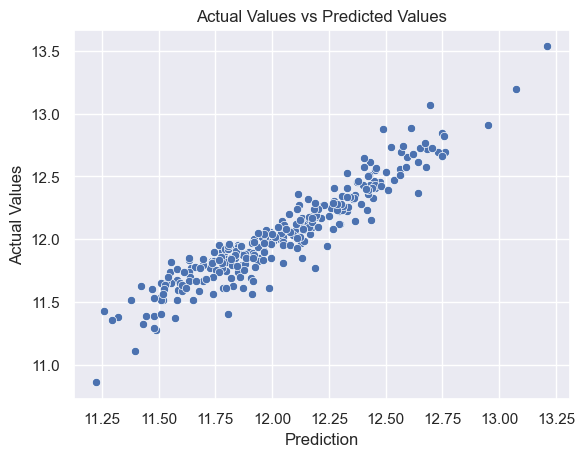

In [117]:
sns.scatterplot(y=y_test, x=y_pred, )
plt.xlabel('Prediction')
plt.ylabel('Actual Values')
plt.title('Actual Values vs Predicted Values')

### bayesianRidge regressor is one of the best, so let's tune it's hyperparameters

In [118]:
hyperparameters = {
    'alpha_1': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3,1e-2,1e-1],
    'alpha_2': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3,1e-2,1e-1],
    'lambda_1': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3,1e-2,1e-1],
    'lambda_2': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3,1e-2,1e-1],
    'fit_intercept': [True, False],
    'tol': [1e-5, 1e-4, 1e-3],
    'n_iter': [100, 500, 1000]
}

In [119]:
# Create the Bayesian Ridge Regression model
model = BayesianRidge()

# Perform randomized search
random_search = RandomizedSearchCV(
    estimator=model,
    param_distributions=hyperparameters,
    n_iter=2000,  # Number of parameter settings that are sampled
    scoring='r2',  # Evaluation metric to optimize
    cv=5,  # Number of cross-validation folds
    random_state=27
)

# Fit the randomized search on your housing data
random_search.fit(x_train, y_train)

# Print the best hyperparameter values and the corresponding score
print("Best Hyperparameters: ", random_search.best_params_)
print("Best Score: ", random_search.best_score_)

Best Hyperparameters:  {'tol': 0.001, 'n_iter': 1000, 'lambda_2': 1e-09, 'lambda_1': 0.1, 'fit_intercept': True, 'alpha_2': 0.1, 'alpha_1': 1e-07}
Best Score:  0.8995375552617582


 {'tol': 0.0001, 'n_iter': 500, 'lambda_2': 0.1, 'lambda_1': 0.1, 'fit_intercept': True, 'alpha_2': 0.1, 'alpha_1': 1e-08}
Best Score:  0.8671424408509264

{'tol': 0.001, 'n_iter': 1000, 'lambda_2': 1e-09, 'lambda_1': 0.1, 'fit_intercept': True, 'alpha_2': 0.1, 'alpha_1': 1e-07}
Best Score:  0.8953834136232345

{'tol': 0.001, 'n_iter': 1000, 'lambda_2': 1e-09, 'lambda_1': 0.1, 'fit_intercept': True, 'alpha_2': 0.1, 'alpha_1': 1e-07}
Best Score:  0.8995375552617582

#### tuned model

In [120]:
model = BayesianRidge(alpha_1= 1e-07, alpha_2=0.1, fit_intercept= True, lambda_1= 0.1, lambda_2= 1e-09, n_iter=1000, tol=0.001)

In [121]:
model.fit(x_train, y_train)

BayesianRidge(alpha_1=1e-07, alpha_2=0.1, lambda_1=0.1, lambda_2=1e-09,
              n_iter=1000)

In [122]:
y_pred = model.predict(x_test)
r2_score(y_test, y_pred), mean_absolute_error(y_test, y_pred)

(0.8928363899838448, 0.09191546923266371)

In [123]:
adj_r2_score(x_train, y_test, y_pred)

0.8900837374679295

#### check if our model overfits

In [124]:
y_pred_train = model.predict(x_train)
r2_score(y_train, y_pred_train), mean_absolute_error(y_train, y_pred_train)

(0.9065908119862931, 0.08954567016292893)

- the model is not overfitted. since the metrics gotten from our training datasets are not that different from that of our test data.

#### plot the predictions vs the actual values

Text(0.5, 1.0, 'Actual Values vs Predicted Values')

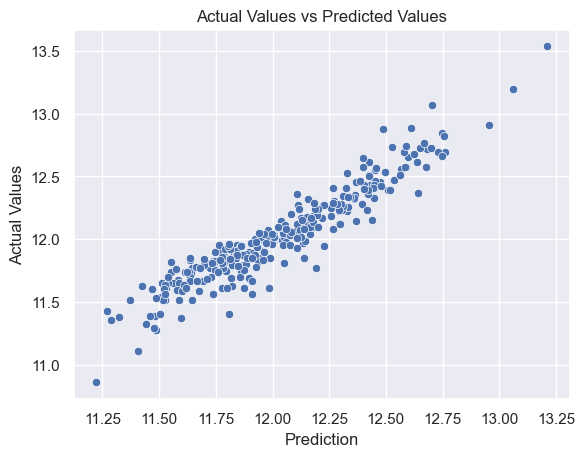

In [125]:
sns.scatterplot(y=y_test, x=y_pred, )
plt.xlabel('Prediction')
plt.ylabel('Actual Values')
plt.title('Actual Values vs Predicted Values')

## tune the ramdom forest model

In [126]:
param = {
    'n_estimators': [100, 200, 300, 400],  # Number of trees in the forest
    'max_depth': [None, 5, 10],  # Maximum depth of each tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 4]  # Minimum number of samples required at each leaf node
}

In [127]:
# Create the RandomForest Regression model
model = RandomForestRegressor()

# Perform randomized search
random_search = RandomizedSearchCV(
    estimator=model,
    param_distributions=param,
    n_iter=10,  # Number of parameter settings that are sampled
    scoring='r2',  # Evaluation metric to optimize
    cv=5,  # Number of cross-validation folds
    random_state=27
)

# Fit the randomized search on your housing data
random_search.fit(x_train, y_train)

# Print the best hyperparameter values and the corresponding score
print("Best Hyperparameters: ", random_search.best_params_)
print("Best Score: ", random_search.best_score_)

Best Hyperparameters:  {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 10}
Best Score:  0.8728350951237449


### tuned model

In [128]:
model_rf = RandomForestRegressor(n_estimators= 200, min_samples_split= 2, min_samples_leaf= 1, max_depth= 10)

In [129]:
model_rf.fit(x_train, y_train)

RandomForestRegressor(max_depth=10, n_estimators=200)

In [130]:
ypred = model_rf.predict(x_test)
r2_score(y_test, ypred), mean_absolute_error(y_test, ypred)

(0.8911748199324795, 0.09115296552093877)

In [131]:
adj_r2_score(x_train, y_test, ypred)

0.8883794875835352

#### check if it overfits

In [132]:
ypred_train = model_rf.predict(x_train)
r2_score(y_train, ypred_train), mean_absolute_error(y_train, ypred_train)

(0.9777982767847677, 0.04364068266609999)

- our randomforest model seems to be overfitted.

### so far the BayeRidgeRegressor & LinearRegressor performed better.
- let's stack them

# stacked model

In [133]:
from mlxtend.regressor import StackingCVRegressor

In [134]:
# Create the base regression models
model1 = LinearRegression(fit_intercept= True, normalize= True)
model2 = BayesianRidge(alpha_1= 1e-07, alpha_2=0.1, fit_intercept= True, lambda_1= 0.1, lambda_2= 1e-09, n_iter=1000, tol=0.001)
model3 = RandomForestRegressor(n_estimators= 200, min_samples_split= 2, min_samples_leaf= 1, max_depth= 10)
model4 = ElasticNet()
model5 = ARDRegression(alpha_1= 0.40775141554763916, alpha_2= 5.908929431882418, lambda_1= 6.775643618422825, lambda_2= 0.16587828927856152)
model6 = HuberRegressor() 
model7 = Lasso()

In [135]:
# Create the meta-model (final model)
meta_model = ARDRegression(fit_intercept= True, normalize= True)

# Create the stacking regressor
stacked_model = StackingCVRegressor(regressors=[model1, model2, model3, model5],
                                    meta_regressor=meta_model,
                                    cv=5)

# Fit the stacked model
stacked_model.fit(x_train, y_train)

# Generate predictions using the stacked model
stacked_predictions = stacked_model.predict(x_test)

# Evaluate the performance of the stacked model
mse = mean_squared_error(y_test, stacked_predictions)
print("Mean Squared Error (Stacked Model): ", mse)

C:\Users\deauy\anaconda3\envs\TensorFlow\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
C:\Users\deauy\anaconda3\envs\TensorFlow\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeli

Mean Squared Error (Stacked Model):  0.013797183969275687


C:\Users\deauy\anaconda3\envs\TensorFlow\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
C:\Users\deauy\anaconda3\envs\TensorFlow\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but BayesianRidge was fitted without feature names
  warnings.warn(
C:\Users\deauy\anaconda3\envs\TensorFlow\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(
C:\Users\deauy\anaconda3\envs\TensorFlow\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but ARDRegression was fitted without feature names
  warnings.warn(


### plot their results

Text(0.5, 1.0, 'Actual Values vs Predicted Values')

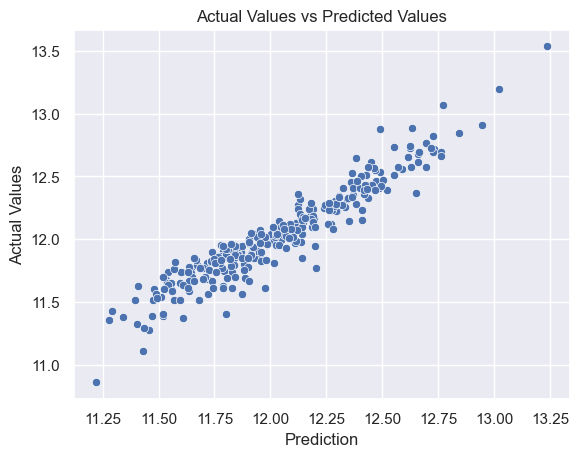

In [136]:
sns.scatterplot(y=y_test, x=stacked_predictions)
plt.xlabel('Prediction')
plt.ylabel('Actual Values')
plt.title('Actual Values vs Predicted Values')

In [137]:
df_.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 30 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   OverallQual                  1459 non-null   int64  
 1   GrLivArea                    1459 non-null   float64
 2   GarageArea                   1458 non-null   float64
 3   TotalBsmtSF                  1458 non-null   float64
 4   FullBath                     1459 non-null   int64  
 5   YearBuilt                    1459 non-null   int64  
 6   YearRemodAdd                 1459 non-null   int64  
 7   MasVnrArea                   1444 non-null   float64
 8   Fireplaces                   1459 non-null   int64  
 9   BsmtFinSF1                   1458 non-null   float64
 10  WoodDeckSF                   1459 non-null   float64
 11  OpenPorchSF                  1459 non-null   float64
 12  HalfBath                     1459 non-null   int64  
 13  LotArea           

In [138]:
# percentage null
df_.isnull().sum()/df_.shape[0]

OverallQual                    0.000000
GrLivArea                      0.000000
GarageArea                     0.000685
TotalBsmtSF                    0.000685
FullBath                       0.000000
YearBuilt                      0.000000
YearRemodAdd                   0.000000
MasVnrArea                     0.010281
Fireplaces                     0.000000
BsmtFinSF1                     0.000685
WoodDeckSF                     0.000000
OpenPorchSF                    0.000000
HalfBath                       0.000000
LotArea                        0.000000
BsmtFullBath                   0.001371
Id                             0.000000
KitchenQualtarget_encoded      0.007539
SaleConditiontarget_encoded    0.007539
Neighborhoodtarget_encoded     0.007539
CentralAirtarget_encoded       0.007539
Electricaltarget_encoded       0.007539
Foundationtarget_encoded       0.007539
SaleTypetarget_encoded         0.007539
PavedDrivetarget_encoded       0.007539
BedroomAbvGrtarget_encoded     0.007539


In [139]:
df_no_fill = df_.copy()
df_ = df_.fillna(np.mean(df_))

In [140]:
test = df_.drop('Id', axis=1)
id_ = df_.Id

final_model = LinearRegression(fit_intercept= True, normalize= True)
final_model.fit(x_train, y_train)

final_model_ = BayesianRidge(alpha_1= 1e-07, alpha_2=0.1, fit_intercept= True, lambda_1= 0.1, lambda_2= 1e-09, n_iter=1000, tol=0.001)
final_model_.fit(x_train, y_train)

#### let's factor in some other models in our final prediction

In [141]:
import xgboost as xgb
import lightgbm as lgb

In [142]:
lgb = lgb.LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.05, n_estimators=720,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)

xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1)

In [158]:
lgb = lgb.fit(x_train, y_train)
xgb = xgb.fit(x_train, y_train)

[LightGBM] [Warning] feature_fraction is set=0.2319, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2319
[LightGBM] [Warning] min_data_in_leaf is set=6, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=6
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[15:54:47] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "silent" } are not used.



In [159]:
# lgb
pred = lgb.predict(x_test)
print('MAE: ',mean_absolute_error(y_test, pred))
print('MSE: ',mean_squared_error(y_test, pred))
print('R2: ',r2_score(y_test, pred))
adj_r2_score(x_train, y_test, pred)

MAE:  0.08617404010015352
MSE:  0.013930717864240553
R2:  0.9010259311733257


0.8984836388828266

In [160]:
# xgb
pred = xgb.predict(x_test)
print('MAE: ',mean_absolute_error(y_test, pred))
print('MSE: ',mean_squared_error(y_test, pred))
print('R2: ',r2_score(y_test, pred))
adj_r2_score(x_train, y_test, pred)

MAE:  0.08743320592272869
MSE:  0.013873680577443249
R2:  0.9014311660222529


0.8988992827757032

In [162]:
predictions = np.exp((stacked_model.predict(test) * 0.5) + (lgb.predict(test) * 0.25) + (xgb.predict(test) * 0.25))

C:\Users\deauy\anaconda3\envs\TensorFlow\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
C:\Users\deauy\anaconda3\envs\TensorFlow\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but BayesianRidge was fitted without feature names
  warnings.warn(
C:\Users\deauy\anaconda3\envs\TensorFlow\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(
C:\Users\deauy\anaconda3\envs\TensorFlow\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but ARDRegression was fitted without feature names
  warnings.warn(


In [150]:
final_pred = pd.Series(predictions)

In [151]:
np.set_printoptions(suppress=True)

In [163]:
results = pd.DataFrame({'Id':id_, 'SalePrice':predictions.round(0)})

In [164]:
results.to_csv('submission.csv', index=False)

### scatter plot

In [167]:
pred_ = ((stacked_model.predict(x_test) * 0.5) + (lgb.predict(x_test) * 0.25) + (xgb.predict(x_test) * 0.25))

C:\Users\deauy\anaconda3\envs\TensorFlow\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
C:\Users\deauy\anaconda3\envs\TensorFlow\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but BayesianRidge was fitted without feature names
  warnings.warn(
C:\Users\deauy\anaconda3\envs\TensorFlow\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(
C:\Users\deauy\anaconda3\envs\TensorFlow\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but ARDRegression was fitted without feature names
  warnings.warn(


Text(0.5, 1.0, 'Actual Values vs Predicted Values')

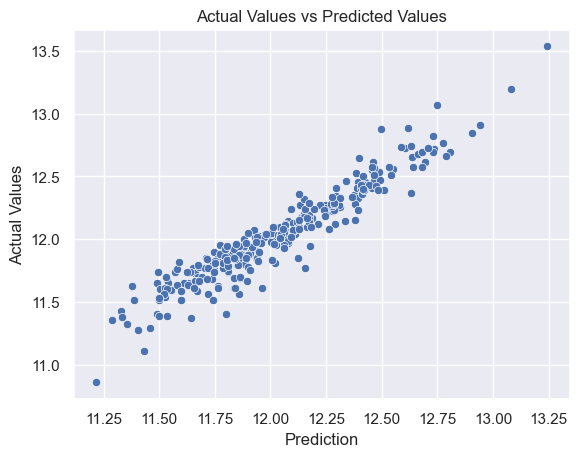

In [168]:
sns.scatterplot(y=y_test, x=pred_)
plt.xlabel('Prediction')
plt.ylabel('Actual Values')
plt.title('Actual Values vs Predicted Values')